In [90]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [156]:
df=pd.read_csv("sea-surface.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

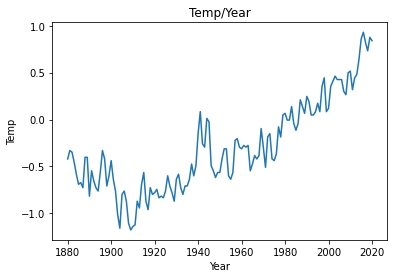

In [157]:
d= df["Year"]
y = df["Annual anomaly"]
plt.title('Temp/Year')
plt.xlabel('Year')
plt.ylabel('Temp')
y=y.values.reshape(141,1)
plt.plot(d,y)
plt.show

In [158]:
df=df[['Annual anomaly']]
df.head(4)

,Annual anomaly
0,-0.420
1,-0.330
2,-0.348
3,-0.456


In [188]:
future_days=15
df['Prediction']=df[['Annual anomaly']].shift(-future_days)
df.tail(4)

,Annual anomaly,Prediction
137,0.822,NaN
138,0.732,NaN
139,0.876,NaN
140,0.840,NaN


In [189]:
X=np.array(df.drop(['Prediction'],axis=1))[:-future_days]
print(X)

[[-0.42 ]
 [-0.33 ]
 [-0.348]
 [-0.456]
 [-0.582]
 [-0.69 ]
 [-0.672]
 [-0.726]
 [-0.402]
 [-0.402]
 [-0.816]
 [-0.546]
 [-0.654]
 [-0.726]
 [-0.762]
 [-0.564]
 [-0.33 ]
 [-0.42 ]
 [-0.708]
 [-0.6  ]
 [-0.438]
 [-0.636]
 [-0.762]
 [-1.014]
 [-1.158]
 [-0.798]
 [-0.762]
 [-0.87 ]
 [-1.104]
 [-1.176]
 [-1.14 ]
 [-1.122]
 [-0.87 ]
 [-0.942]
 [-0.69 ]
 [-0.564]
 [-0.87 ]
 [-0.96 ]
 [-0.726]
 [-0.798]
 [-0.78 ]
 [-0.744]
 [-0.834]
 [-0.816]
 [-0.834]
 [-0.762]
 [-0.6  ]
 [-0.708]
 [-0.78 ]
 [-0.87 ]
 [-0.636]
 [-0.582]
 [-0.726]
 [-0.798]
 [-0.708]
 [-0.708]
 [-0.636]
 [-0.474]
 [-0.6  ]
 [-0.492]
 [-0.15 ]
 [ 0.084]
 [-0.258]
 [-0.294]
 [ 0.012]
 [-0.024]
 [-0.492]
 [-0.546]
 [-0.618]
 [-0.564]
 [-0.564]
 [-0.42 ]
 [-0.312]
 [-0.312]
 [-0.6  ]
 [-0.636]
 [-0.564]
 [-0.222]
 [-0.204]
 [-0.294]
 [-0.312]
 [-0.276]
 [-0.294]
 [-0.276]
 [-0.546]
 [-0.474]
 [-0.384]
 [-0.42 ]
 [-0.384]
 [-0.096]
 [-0.294]
 [-0.51 ]
 [-0.186]
 [-0.15 ]
 [-0.42 ]
 [-0.438]
 [-0.366]
 [-0.078]
 [-0.186]
 [ 0.048]


In [190]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[-0.564 -0.33  -0.42  -0.708 -0.6   -0.438 -0.636 -0.762 -1.014 -1.158
 -0.798 -0.762 -0.87  -1.104 -1.176 -1.14  -1.122 -0.87  -0.942 -0.69
 -0.564 -0.87  -0.96  -0.726 -0.798 -0.78  -0.744 -0.834 -0.816 -0.834
 -0.762 -0.6   -0.708 -0.78  -0.87  -0.636 -0.582 -0.726 -0.798 -0.708
 -0.708 -0.636 -0.474 -0.6   -0.492 -0.15   0.084 -0.258 -0.294  0.012
 -0.024 -0.492 -0.546 -0.618 -0.564 -0.564 -0.42  -0.312 -0.312 -0.6
 -0.636 -0.564 -0.222 -0.204 -0.294 -0.312 -0.276 -0.294 -0.276 -0.546
 -0.474 -0.384 -0.42  -0.384 -0.096 -0.294 -0.51  -0.186 -0.15  -0.42
 -0.438 -0.366 -0.078 -0.186  0.048  0.066 -0.006 -0.006  0.138 -0.042
 -0.114 -0.042  0.21   0.138  0.066  0.246  0.192  0.048  0.048  0.084
  0.174  0.084  0.354  0.444  0.084  0.12   0.354  0.408  0.462  0.426
  0.426  0.426  0.3    0.264  0.498  0.516  0.318  0.444  0.48   0.642
  0.858  0.93   0.822  0.732  0.876  0.84 ]


In [192]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.25)


In [194]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [195]:
x_future=df.drop(['Prediction'],axis=1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[0.192],
       [0.048],
       [0.048],
       [0.084],
       [0.174],
       [0.084],
       [0.354],
       [0.444],
       [0.084],
       [0.12 ],
       [0.354],
       [0.408],
       [0.462],
       [0.426],
       [0.426]])

In [196]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[0.426 0.084 0.084 0.084 0.426 0.084 0.687 0.48  0.084 0.858 0.687 0.876
 0.732 0.876 0.876]

[0.29776639 0.15890701 0.15890701 0.19362186 0.28040897 0.19362186
 0.4539832  0.54077031 0.19362186 0.2283367  0.4539832  0.50605546
 0.55812773 0.52341289 0.52341289]


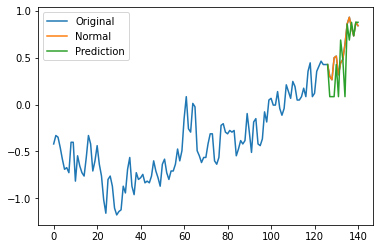

In [200]:
prediction= tree_prediction
valid = df[X.shape[0]:]
valid['Predictions']= prediction
plt.plot(df['Annual anomaly'])
plt.plot(valid['Annual anomaly'])
plt.plot(valid['Predictions'])
plt.legend(['Original','Normal','Prediction'])

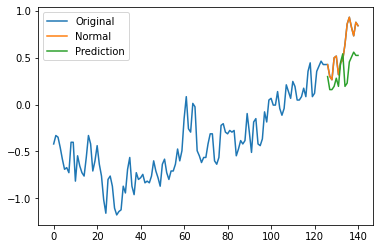

In [199]:
prediction= lr_prediction
valid = df[X.shape[0]:]
valid['Predictions']= prediction
plt.plot(df['Annual anomaly'])
plt.plot(valid['Annual anomaly'])
plt.plot(valid['Predictions'])
plt.legend(['Original','Normal','Prediction'])